In [2]:
# import pandas, numpy, os, and matplotlib.pyplot
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
path_to_data = 'DATASET_and_OUTPUT/fine_resolution/OUTPUT'
os.listdir(path_to_data)

['bdt_Ntotsamples_130000',
 'bdt_Ntotsamples_370000',
 'bdt_Ntotsamples_270000',
 'bdt_Ntotsamples_170000',
 'bdt_Ntotsamples_310000',
 'bdt_Ntotsamples_70000',
 'bdt_Ntotsamples_330000',
 'indexshift6',
 'bdt_Ntotsamples_290000',
 'bdt_Ntotsamples_90000',
 'bdt_Ntotsamples_190000',
 'bdt_Ntotsamples_150000',
 'bdt_Ntotsamples_350000',
 'bdt_Ntotsamples_390000',
 'bdt_Ntotsamples_210000',
 'bdt_Ntotsamples_230000',
 'bdt_Ntotsamples_250000',
 'bdt_Ntotsamples_110000',
 'bdt_Ntotsamples_30000',
 'def_max_deviation_beforeAug28',
 'bdt_Ntotsamples_10000',
 'test_preclassifier',
 'bdt_Ntotsamples_50000']

### N_samples is the number of samples for each class

In [8]:
Nsamples = [10000+i*20000 for i in range(20)]
print(Nsamples)


[10000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000, 210000, 230000, 250000, 270000, 290000, 310000, 330000, 350000, 370000, 390000]


In [9]:
def getfoldername(Nsample):
    return f'bdt_Ntotsamples_{Nsample}'

def get_accuracies(path_to_data=''):
    df = pd.read_csv('/'.join([path_to_data, 'preclassification_testdataset.csv']))
    # c1
    c1 = df[df['class']==0]
    acc_c1 = np.sum(c1['pred_class']==c1['true_class'])/len(c1)
    # c2
    c2 = df[df['class']==1]
    acc_c2 = np.sum(c2['pred_class']==c2['true_class'])/len(c2)
    # c3
    c3 = df[df['class']==2]
    acc_c3 = np.sum(c3['pred_class']==c3['true_class'])/len(c3)
    # c4
    c4 = df[df['class']==3]
    acc_c4 = np.sum(c4['pred_class']==c4['true_class'])/len(c4)
    return {'c1': acc_c1*100, 'c2': acc_c2*100, 'c3': acc_c3*100, 'c4': acc_c4*100}

test_folder = '/'.join([path_to_data, getfoldername(Nsamples[2]), 'preclassifier'])


In [92]:
acc = get_accuracies(test_folder)

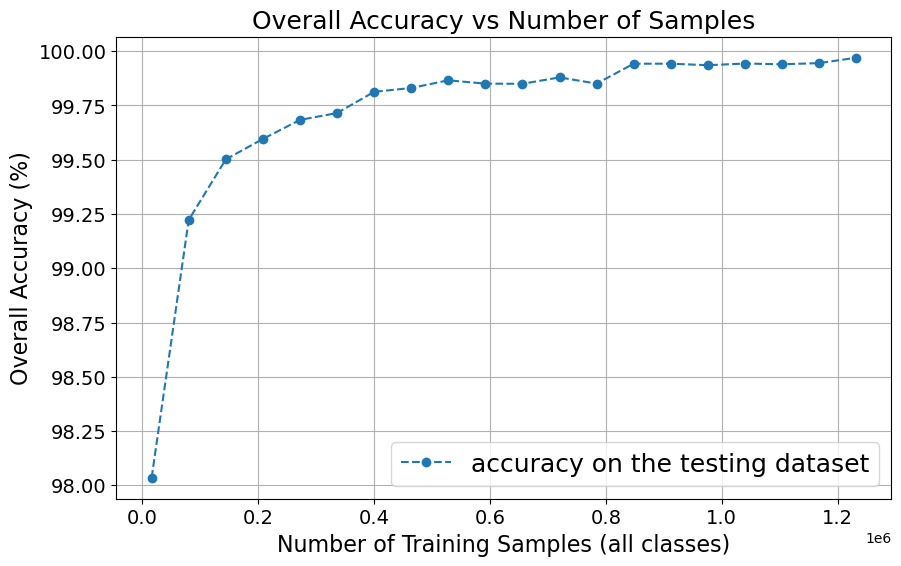

In [95]:
plt.figure(figsize=(10, 6))

# for key in accuracies.keys():
    # plt.plot(np.array(Nsamples)*0.8*4, accuracies[key], marker='o', linestyle='--', label=key)
accuracies = []
for Nsample in Nsamples:
    test_folder = '/'.join([path_to_data, getfoldername(Nsample), 'preclassifier'])
    acc = get_accuracies(test_folder)
    accuracy = acc['c1']+acc['c2']+acc['c3']+acc['c4']
    accuracies.append(accuracy/4)
plt.plot(np.array(Nsamples)*0.8*4, accuracies, marker='o', linestyle='--', label='accuracy on the testing dataset')
plt.title('Overall Accuracy vs Number of Samples', fontsize=18)
plt.xlabel('Number of Training Samples (all classes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Overall Accuracy (%)', fontsize=16)
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [10]:
accuracies = {'c1': [], 'c2': [], 'c3': [], 'c4': []}
for Nsample in Nsamples:
    test_folder = '/'.join([path_to_data, getfoldername(Nsample), 'preclassifier'])
    acc = get_accuracies(test_folder)
    for key in accuracies.keys():
        accuracies[key].append(acc[key])

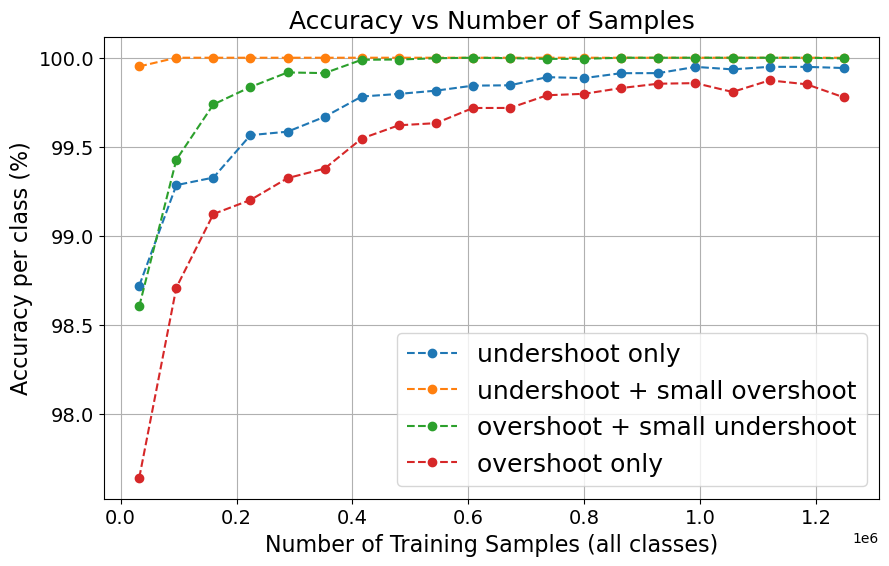

In [11]:
plt.figure(figsize=(10, 6))
map_labels = {'c1': 'undershoot only',
              'c2': 'undershoot + small overshoot',
              'c3': 'overshoot + small undershoot',
              'c4': 'overshoot only'}
for key in accuracies.keys():
    plt.plot(np.array(Nsamples)*0.8*4, accuracies[key], marker='o', linestyle='--', label=map_labels[key])
plt.title('Accuracy vs Number of Samples', fontsize=18)
plt.xlabel('Number of Training Samples (all classes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Accuracy per class (%)', fontsize=16)
plt.legend(fontsize=18)
plt.grid()
plt.show()